In [1]:
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd

In [2]:
#importing file in csv format
data =pd.read_csv("C:/Users/Lenovo/Desktop/project/heartdisease1.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3.0,2,0,0,2
1,44,1,4,130,209,0,1,127,0,0.0,0,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0


In [3]:
#number of coloumns and rows
data.shape

(200, 14)

In [4]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

In [5]:
#null values
data.isnull().sum(axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [6]:
len(data)

200

In [7]:
#finding the correlation
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,0.034230,-0.038280,0.039836,0.049923,0.135728,0.002400,-0.056605,0.106330,0.134659,0.092595,NaN,-0.048196,0.287289
sex,0.034230,1.000000,0.038036,-0.038828,-0.101693,-0.059400,0.060621,-0.037544,-0.008804,0.058379,0.032002,NaN,-0.091739,0.147470
cp,-0.038280,0.038036,1.000000,0.226815,0.048981,-0.044416,0.034790,0.172127,0.277842,0.186268,0.213681,NaN,0.140282,0.168210
trestbps,0.039836,-0.038828,0.226815,1.000000,0.003277,-0.010777,-0.002053,0.875749,0.577448,0.480473,0.487198,NaN,0.210492,0.085980
chol,0.049923,-0.101693,0.048981,0.003277,1.000000,0.156311,0.002391,-0.089120,0.034514,-0.060076,-0.059847,NaN,-0.068196,0.058451
fbs,0.135728,-0.059400,-0.044416,-0.010777,0.156311,1.000000,0.170616,-0.054900,-0.217705,-0.138832,-0.100362,NaN,0.127438,0.048940
restecg,0.002400,0.060621,0.034790,-0.002053,0.002391,0.170616,1.000000,-0.028064,-0.085550,-0.115200,-0.142594,NaN,0.068775,-0.032800
thalach,-0.056605,-0.037544,0.172127,0.875749,-0.089120,-0.054900,-0.028064,1.000000,0.519453,0.522083,0.522926,NaN,0.202736,0.058226
exang,0.106330,-0.008804,0.277842,0.577448,0.034514,-0.217705,-0.085550,0.519453,1.000000,0.520305,0.539932,NaN,0.146149,0.260111
oldpeak,0.134659,0.058379,0.186268,0.480473,-0.060076,-0.138832,-0.115200,0.522083,0.520305,1.000000,0.752707,NaN,-0.008228,0.383736


In [8]:
#finding mean,std,min,max
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000
mean,59.350000,0.970000,3.505000,96.310000,172.490000,0.340000,0.735000,90.25500,0.475000,0.951000,1.045000,0.0,1.070000,1.520000
std,7.811697,0.171015,0.795701,62.917781,116.752497,0.474898,0.683455,57.50237,0.500628,1.110344,1.166093,0.0,2.427874,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.500000,0.000000,0.0,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,60.000000,1.000000,4.000000,123.000000,214.000000,0.000000,1.000000,111.50000,0.000000,0.500000,0.000000,0.0,0.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.00000,1.000000,2.000000,2.000000,0.0,0.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.00000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    int64  
 4   chol      200 non-null    int64  
 5   fbs       200 non-null    int64  
 6   restecg   200 non-null    int64  
 7   thalach   200 non-null    int64  
 8   exang     200 non-null    int64  
 9   oldpeak   200 non-null    float64
 10  slope     200 non-null    int64  
 11  ca        200 non-null    int64  
 12  thal      200 non-null    int64  
 13  num       200 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 22.0 KB


In [10]:

data.num.value_counts()

1    56
0    51
3    42
2    41
4    10
Name: num, dtype: int64

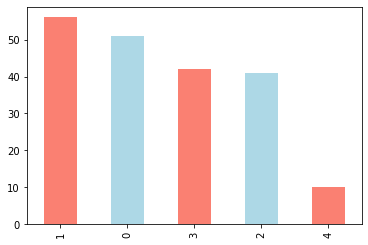

In [11]:
data.num.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [12]:
categorical_val = []
continous_val = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 44 60 55 66 65 56 59 62 57 46 58 64 74 52 69 51 54 77 61 40 41 42 53
 68 67 72 75 49 35 43 48 50 45 76 70 71 38 37]
sex : [1 0]
cp : [4 3 2 1]
trestbps : [140 130 132 142 110 120 150 180 160 126   0 128 170 152 116 124 122 144
 154 125 104 136 134 138 178 146 135 158 106 112 102  96 172 155 156 118
 100 190 114 127]
chol : [260 209 218 228 213   0 236 267 166 220 177 186 100 171 230 281 203 277
 233 240 153 224 316 311 270 217 214 252 339 216 276 458 241 384 297 248
 308 208 227 210 245 225 198 195 161 258 235 305 223 282 349 160 312 283
 142 211 306 222 202 197 204 274 192 298 272 200 261 181 221 175 219 310
 232 273 182 292 289 193 170 369 173 271 244 285 243 237 165 287 256 264
 226 207 284 337 254 300 333 139 385]
fbs : [0 1]
restecg : [1 2 0]
thalach : [112 127 140 149  99 120 105 141 157 117   0 148  86  84 125 118 124 106
 111 180 129 110 155 122 133 131  80 165 107 128 160  97 161 130 108 123
 144 102 145  69 138 150  88 132 121 135 100 162  73 154 115 119 159  94
 11

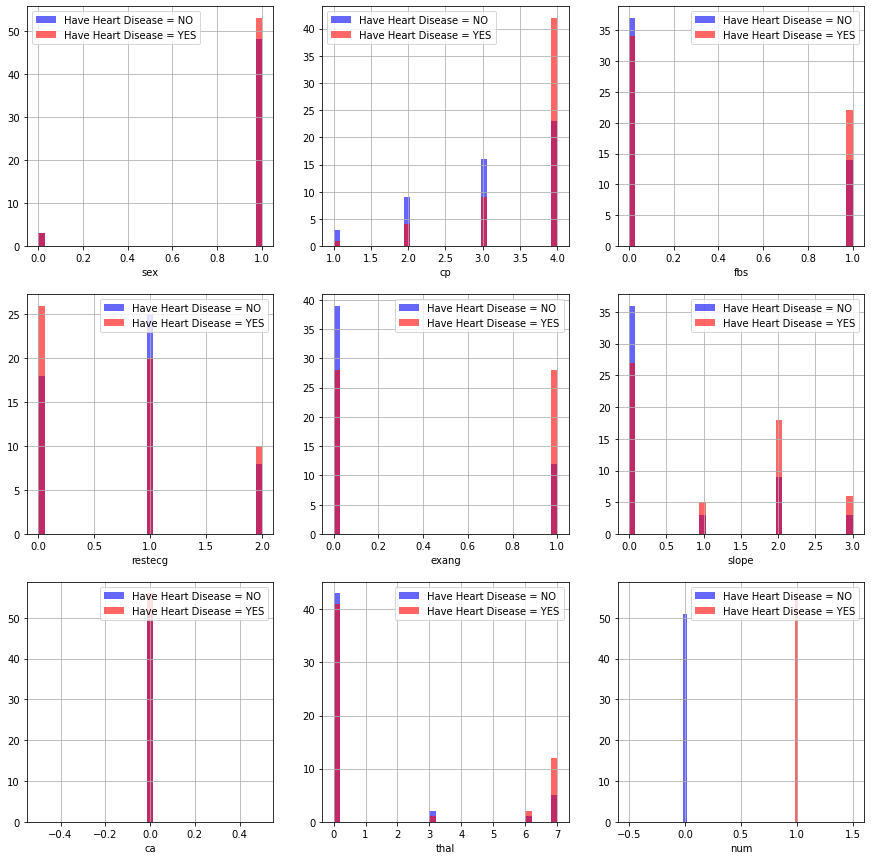

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["num"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["num"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)


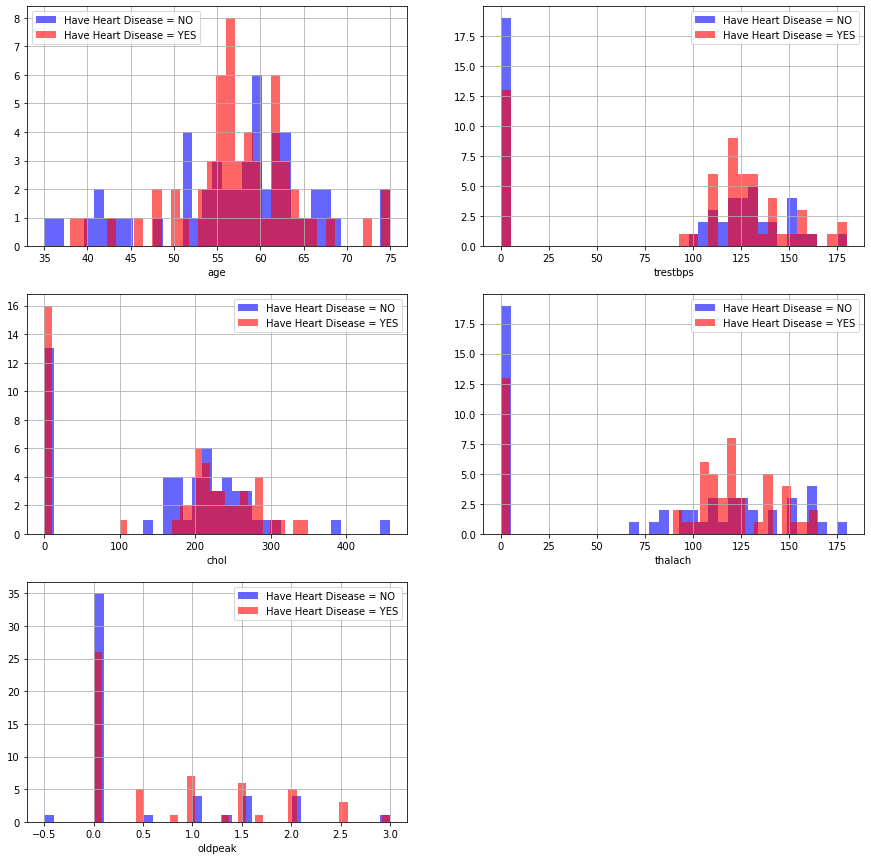

In [14]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["num"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["num"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

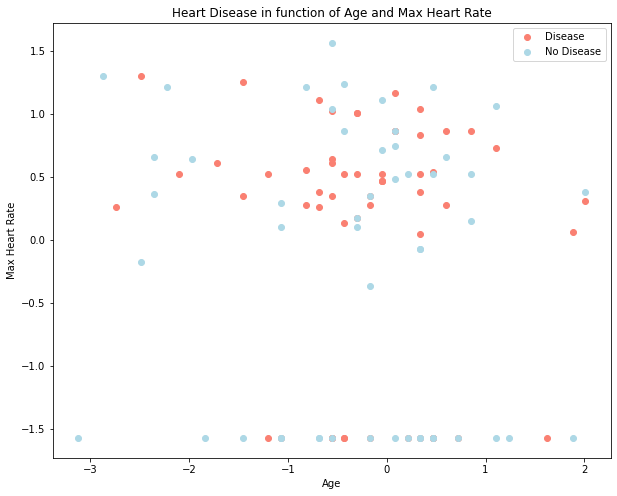

In [21]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(data.age[data.num==1],
            data.thalach[data.num==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(data.age[data.num==0],
            data.thalach[data.num==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [22]:
if "num" in categorical_val:
    categorical_val.remove("num") 
else: 
    print("num does not exist in the list") 

    
dataset = pd.get_dummies(data, columns = categorical_val)
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

num does not exist in the list


In [23]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,num,sex_0,sex_1,cp_1,cp_2,...,exang_1,slope_0,slope_1,slope_2,slope_3,ca_0,thal_0,thal_3,thal_6,thal_7
0,0.468421,0.696141,0.751415,0.379107,1.850005,2,0,1,0,0,...,1,0,0,1,0,1,1,0,0,0
1,-1.969933,0.536804,0.313498,0.640621,-0.858641,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
2,0.083417,0.568672,0.390777,0.867266,0.495682,2,0,1,0,0,...,1,0,0,0,1,1,1,0,0,0
3,-0.558255,0.728008,0.476643,1.024174,1.398564,1,0,1,0,0,...,1,0,1,0,0,1,1,0,0,0
4,0.853424,0.218132,0.347844,0.152462,0.315106,0,0,1,0,0,...,1,0,0,1,0,1,1,0,0,0


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        
from sklearn.model_selection import train_test_split

X = dataset.drop('num', axis=1)
y = dataset.num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)        
               

In [25]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

In [26]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,43.571429,31.666667


In [27]:
import joblib
import sklearn
svc = sklearn.svm.SVC()

In [28]:
joblib.dump(svc, 'heart disease.pkl')

['heart disease.pkl']